https://www.kaggle.com/code/meenaaa/cancer-death-rate-xgboost/notebook

https://www.researchgate.net/publication/341042405_On_linear_regression_models_with_hierarchical_categorical_variables

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.model_selection import train_test_split

import time
import pickle

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [9]:
compare_fe_fs = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Compare/compare_fe_fs.csv")
compare_fe_fs.head(5)

,Geography,Actual,Predict,Deviation
0,"Linn County, Oregon",186.5,182.73853,0.019313
1,"Champaign County, Illinois",152.5,168.75772,0.083135
2,"Saratoga County, New York",174.2,161.89906,0.024804
3,"Montmorency County, Michigan",207.6,187.44191,0.081560
4,"Barrow County, Georgia",192.0,188.62709,0.070808


In [10]:
compare_fe_full = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Compare/compare_fe_full.csv")
compare_fe_full.head(5)

,Geography,Actual,Predict,Deviation
0,"Linn County, Oregon",186.5,182.73853,0.020169
1,"Champaign County, Illinois",152.5,168.75772,0.106608
2,"Saratoga County, New York",174.2,161.89906,0.070614
3,"Montmorency County, Michigan",207.6,187.44191,0.097101
4,"Barrow County, Georgia",192.0,188.62709,0.017567


In [11]:
compare_raw_full = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Compare/compare_raw_full.csv")
compare_raw_full.head(5)

,Geography,Actual,Predict,Deviation
0,"Linn County, Oregon",186.5,176.69582,0.052569
1,"Champaign County, Illinois",152.5,159.14197,0.043554
2,"Saratoga County, New York",174.2,163.96185,0.058772
3,"Montmorency County, Michigan",207.6,201.80174,0.027930
4,"Barrow County, Georgia",192.0,191.93270,0.000351


In [12]:
compare_raw_fs = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Compare/compare_raw_fs.csv")
compare_raw_fs.head(5)

,Geography,Actual,Predict,Deviation
0,"Linn County, Oregon",186.5,176.69582,0.029079
1,"Champaign County, Illinois",152.5,159.14197,0.111968
2,"Saratoga County, New York",174.2,163.96185,0.086471
3,"Montmorency County, Michigan",207.6,201.80174,0.039751
4,"Barrow County, Georgia",192.0,191.93270,0.038671


# Visualize

## Concat Dataset

In [33]:
detail = {
    "Geography" : compare_raw_fs.Geography.to_numpy(),
    "Actual": compare_raw_fs.Actual.to_numpy(),
    "Predict_Raw_FS": compare_raw_fs.Predict.to_numpy(),
    "Predict_Raw_Full": compare_raw_full.Predict.to_numpy(),
    "Predict_RFE_FS": compare_fe_fs.Predict.to_numpy(),
    "Predict_RFE_Full": compare_fe_full.Predict.to_numpy(),
    "Deviation_Raw_FS": compare_raw_fs.Deviation.to_numpy(),
    "Deviation_Raw_Full": compare_raw_full.Deviation.to_numpy(),
    "Deviation_RFE_FS": compare_fe_fs.Deviation.to_numpy(),
    "Deviation_RFE_Full": compare_fe_full.Deviation.to_numpy()
}
df = pd.DataFrame(detail, columns = ["Geography", "Actual","Predict_Raw_FS", "Predict_Raw_Full", "Predict_RFE_FS", "Predict_RFE_Full","Deviation_Raw_FS", "Deviation_Raw_Full", "Deviation_RFE_FS", "Deviation_RFE_Full"])
df.set_index("Geography", inplace = True)
df.head(5)

,Actual,Predict_Raw_FS,Predict_Raw_Full,Predict_RFE_FS,Predict_RFE_Full,Deviation_Raw_FS,Deviation_Raw_Full,Deviation_RFE_FS,Deviation_RFE_Full
Geography,,,,,,,,,
"Linn County, Oregon",186.5,176.69582,176.69582,182.73853,182.73853,0.029079,0.052569,0.019313,0.020169
"Champaign County, Illinois",152.5,159.14197,159.14197,168.75772,168.75772,0.111968,0.043554,0.083135,0.106608
"Saratoga County, New York",174.2,163.96185,163.96185,161.89906,161.89906,0.086471,0.058772,0.024804,0.070614
"Montmorency County, Michigan",207.6,201.80174,201.80174,187.44191,187.44191,0.039751,0.027930,0.081560,0.097101
"Barrow County, Georgia",192.0,191.93270,191.93270,188.62709,188.62709,0.038671,0.000351,0.070808,0.017567


## Visualize Deviation

In [35]:
devaition = df[["Deviation_Raw_FS", "Deviation_Raw_Full", "Deviation_RFE_FS", "Deviation_RFE_Full"]]
devaition.head(5)

,Deviation_Raw_FS,Deviation_Raw_Full,Deviation_RFE_FS,Deviation_RFE_Full
Geography,,,,
"Linn County, Oregon",0.029079,0.052569,0.019313,0.020169
"Champaign County, Illinois",0.111968,0.043554,0.083135,0.106608
"Saratoga County, New York",0.086471,0.058772,0.024804,0.070614
"Montmorency County, Michigan",0.039751,0.027930,0.081560,0.097101
"Barrow County, Georgia",0.038671,0.000351,0.070808,0.017567


<Axes: >

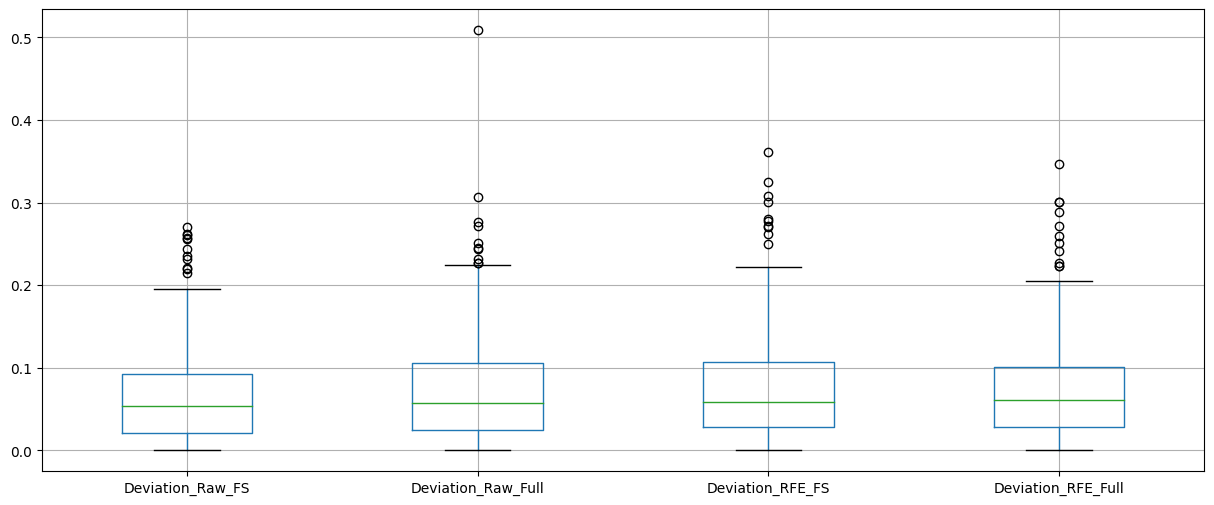

In [37]:
plt.figure(figsize=(15,6))
devaition.boxplot()

## Visualize MSE

In [46]:
#evaluation metrics for regression model
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score

In [48]:
#evaluating the model with the following metrics
#mean squared error
raw_full_mse=mean_squared_error(compare_raw_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())     
#mean absolute error     
raw_full_mae=mean_absolute_error(compare_raw_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())  
#root mean squared error      
raw_full_rmse=np.sqrt(mean_squared_error(compare_raw_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy()))
#r2 score
raw_full_r2 = r2_score(compare_raw_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())

In [49]:
#evaluating the model with the following metrics
#mean squared error
raw_fs_mse=mean_squared_error(compare_raw_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())     
#mean absolute error     
raw_fs_mae=mean_absolute_error(compare_raw_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())  
#root mean squared error      
raw_fs_rmse=np.sqrt(mean_squared_error(compare_raw_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy()))
#r2 score
raw_fs_r2 = r2_score(compare_raw_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())

In [50]:
#evaluating the model with the following metrics
#mean squared error
fe_full_mse=mean_squared_error(compare_fe_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())     
#mean absolute error     
fe_full_mae=mean_absolute_error(compare_fe_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())  
#root mean squared error      
fe_full_rmse=np.sqrt(mean_squared_error(compare_fe_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy()))
#r2 score
fe_full_r2 = r2_score(compare_fe_full.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())

In [51]:
#evaluating the model with the following metrics
#mean squared error
fe_fs_mse=mean_squared_error(compare_fe_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())     
#mean absolute error     
fe_fs_mae=mean_absolute_error(compare_fe_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())  
#root mean squared error      
fe_fs_rmse=np.sqrt(mean_squared_error(compare_fe_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy()))
#r2 score
fe_fs_r2 = r2_score(compare_fe_fs.Predict.to_numpy(), compare_raw_fs.Actual.to_numpy())

In [52]:
raw_full_df =pd.DataFrame({"mse": raw_full_mse,"mae": raw_full_mae,"rmse": raw_full_rmse, "r2": raw_full_r2},index=['Raw Full'])
raw_fs_df =pd.DataFrame({"mse": raw_fs_mse,"mae": raw_fs_mae,"rmse": raw_fs_rmse, "r2": raw_fs_r2},index=['Raw FS'])
fe_full_df =pd.DataFrame({"mse": fe_full_mse,"mae": fe_full_mae,"rmse": fe_full_rmse, "r2": fe_full_r2},index=['RFE Full'])
fe_fs_df =pd.DataFrame({"mse": fe_fs_mse,"mae": fe_fs_mae,"rmse": fe_fs_rmse, "r2": fe_fs_r2},index=['RFE FS'])

In [53]:
df_evaluation = pd.concat([raw_full_df, raw_fs_df, fe_full_df, fe_fs_df]) 
df_evaluation

,mse,mae,rmse,r2
Raw Full,269.842668,12.673092,16.426889,0.468659
Raw FS,269.842668,12.673092,16.426889,0.468659
RFE Full,265.999258,12.746175,16.309484,0.508773
RFE FS,265.999258,12.746175,16.309484,0.508773


<Axes: >

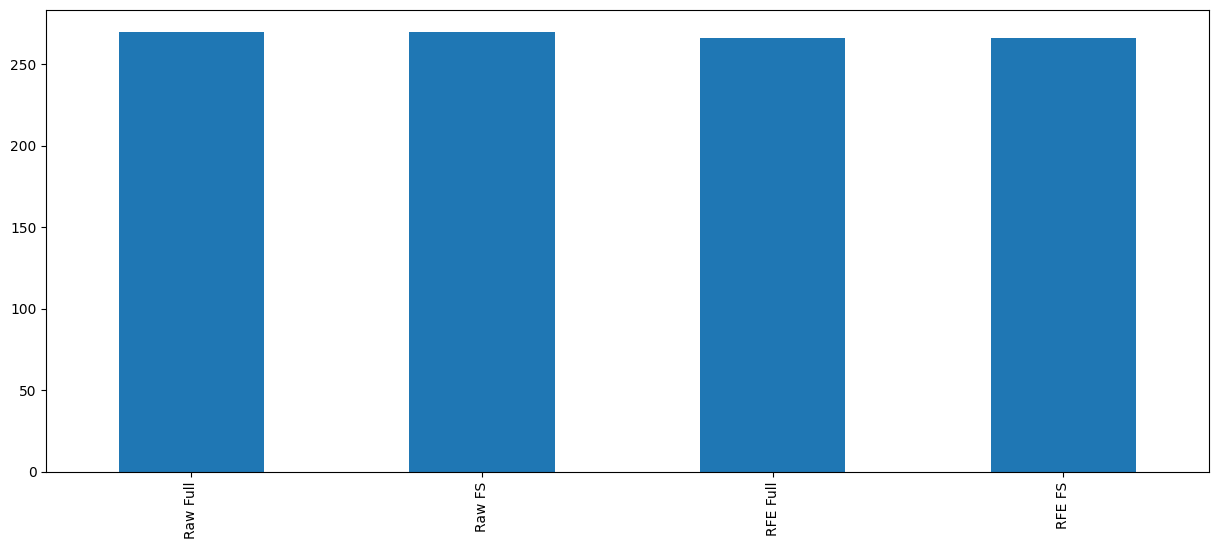

In [56]:
plt.figure(figsize=(15,6))
df_evaluation.mse.plot.bar()